In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize the data to [0, 1] range and reshape to (28, 28, 1)
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

# Set up the batch size and image dimensions
BUFFER_SIZE = 60000
BATCH_SIZE = 256
IMG_SHAPE = (28, 28, 1)

# Create a TensorFlow Dataset for the MNIST images
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [2]:
def build_generator():
    model = tf.keras.Sequential()
    
    model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Reshape((7, 7, 256)))
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    
    return model

In [3]:
def build_discriminator():
    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=IMG_SHAPE))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    
    return model

In [4]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [5]:
@tf.function
def train_step(real_images, generator, discriminator, generator_optimizer, discriminator_optimizer, noise_dim):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as disc_tape, tf.GradientTape() as gen_tape:
        # Generate fake images
        generated_images = generator(noise, training=True)
        
        # Discriminator output for real and fake images
        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        # Calculate the loss for both models
        disc_loss = discriminator_loss(real_output, fake_output)
        gen_loss = generator_loss(fake_output)
    
    # Calculate gradients and apply them
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    return gen_loss, disc_loss



Epoch 1/50 - Generator Loss: 0.7886, Discriminator Loss: 1.3674
Epoch 2/50 - Generator Loss: 0.7390, Discriminator Loss: 1.2706
Epoch 3/50 - Generator Loss: 0.8964, Discriminator Loss: 1.1447
Epoch 4/50 - Generator Loss: 0.9170, Discriminator Loss: 1.0150
Epoch 5/50 - Generator Loss: 1.1073, Discriminator Loss: 0.8989
Epoch 6/50 - Generator Loss: 1.1338, Discriminator Loss: 1.0221
Epoch 7/50 - Generator Loss: 1.4537, Discriminator Loss: 0.8255
Epoch 8/50 - Generator Loss: 1.5672, Discriminator Loss: 0.7823
Epoch 9/50 - Generator Loss: 1.4132, Discriminator Loss: 0.7618
Epoch 10/50 - Generator Loss: 1.5820, Discriminator Loss: 0.6191


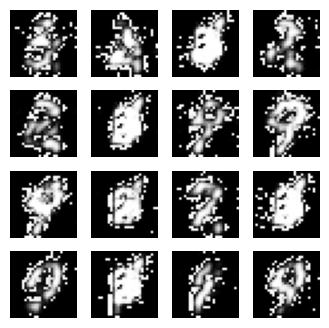

Epoch 11/50 - Generator Loss: 1.5850, Discriminator Loss: 0.8029
Epoch 12/50 - Generator Loss: 1.5844, Discriminator Loss: 0.7701
Epoch 13/50 - Generator Loss: 1.6761, Discriminator Loss: 0.7860
Epoch 14/50 - Generator Loss: 1.6272, Discriminator Loss: 0.6908
Epoch 15/50 - Generator Loss: 1.6781, Discriminator Loss: 0.7969
Epoch 16/50 - Generator Loss: 1.3920, Discriminator Loss: 0.9667
Epoch 17/50 - Generator Loss: 1.2703, Discriminator Loss: 1.0655
Epoch 18/50 - Generator Loss: 1.3489, Discriminator Loss: 1.1416
Epoch 19/50 - Generator Loss: 1.3618, Discriminator Loss: 0.8075
Epoch 20/50 - Generator Loss: 1.5370, Discriminator Loss: 0.9501


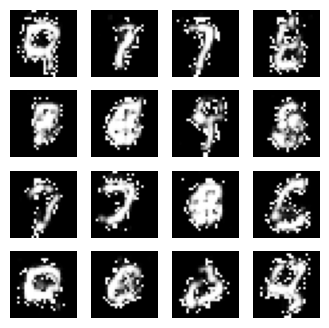

Epoch 21/50 - Generator Loss: 1.5370, Discriminator Loss: 0.9563
Epoch 22/50 - Generator Loss: 1.2574, Discriminator Loss: 1.1034
Epoch 23/50 - Generator Loss: 1.2064, Discriminator Loss: 1.0909
Epoch 24/50 - Generator Loss: 1.1751, Discriminator Loss: 1.0899
Epoch 25/50 - Generator Loss: 1.1631, Discriminator Loss: 1.1347
Epoch 26/50 - Generator Loss: 0.9903, Discriminator Loss: 1.2385
Epoch 27/50 - Generator Loss: 0.9938, Discriminator Loss: 1.1936
Epoch 28/50 - Generator Loss: 1.0178, Discriminator Loss: 1.2836
Epoch 29/50 - Generator Loss: 0.8214, Discriminator Loss: 1.4730
Epoch 30/50 - Generator Loss: 1.0015, Discriminator Loss: 1.2380


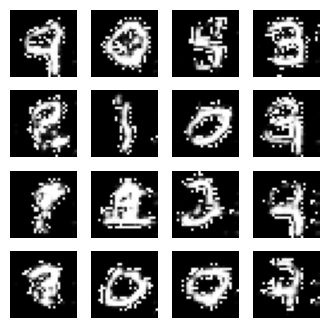

Epoch 31/50 - Generator Loss: 0.9324, Discriminator Loss: 1.2135
Epoch 32/50 - Generator Loss: 1.0326, Discriminator Loss: 1.2261
Epoch 33/50 - Generator Loss: 0.8778, Discriminator Loss: 1.2835
Epoch 34/50 - Generator Loss: 0.8700, Discriminator Loss: 1.2259
Epoch 35/50 - Generator Loss: 0.8534, Discriminator Loss: 1.2894
Epoch 36/50 - Generator Loss: 0.8000, Discriminator Loss: 1.3218
Epoch 37/50 - Generator Loss: 0.8955, Discriminator Loss: 1.2970
Epoch 38/50 - Generator Loss: 0.8461, Discriminator Loss: 1.3049
Epoch 39/50 - Generator Loss: 0.8996, Discriminator Loss: 1.2434
Epoch 40/50 - Generator Loss: 0.8914, Discriminator Loss: 1.2896


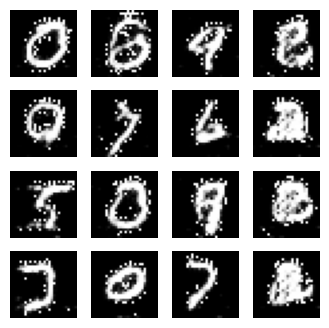

Epoch 41/50 - Generator Loss: 0.8859, Discriminator Loss: 1.3545
Epoch 42/50 - Generator Loss: 0.9974, Discriminator Loss: 1.1268
Epoch 43/50 - Generator Loss: 0.8962, Discriminator Loss: 1.2889
Epoch 44/50 - Generator Loss: 0.9233, Discriminator Loss: 1.2124
Epoch 45/50 - Generator Loss: 0.9251, Discriminator Loss: 1.1942
Epoch 46/50 - Generator Loss: 0.9048, Discriminator Loss: 1.2991
Epoch 47/50 - Generator Loss: 0.8090, Discriminator Loss: 1.3361
Epoch 48/50 - Generator Loss: 0.8254, Discriminator Loss: 1.2769
Epoch 49/50 - Generator Loss: 0.8468, Discriminator Loss: 1.2264
Epoch 50/50 - Generator Loss: 0.8997, Discriminator Loss: 1.1701


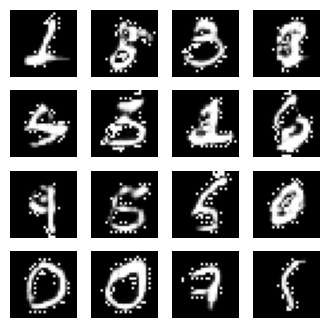

In [6]:
generator = build_generator()
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

noise_dim = 100  # Size of the random noise vector

epochs = 50
for epoch in range(epochs):
    for real_images in train_dataset:
        gen_loss, disc_loss = train_step(real_images, generator, discriminator, generator_optimizer, discriminator_optimizer, noise_dim)
    
    print(f'Epoch {epoch + 1}/{epochs} - Generator Loss: {gen_loss:.4f}, Discriminator Loss: {disc_loss:.4f}')
    
    # Generate and display images every few epochs
    if (epoch + 1) % 10 == 0:
        noise = tf.random.normal([16, noise_dim])
        generated_images = generator(noise, training=False)
        generated_images = generated_images.numpy()
        generated_images = (generated_images * 255).astype(np.uint8)
        
        fig, axes = plt.subplots(4, 4, figsize=(4, 4), sharex=True, sharey=True)
        for i, ax in enumerate(axes.flatten()):
            ax.imshow(generated_images[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
        plt.show()